In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy.linalg import solve
from scipy.integrate import quad
import math

In [2]:
shape_pts = np.array([[-8,1],[-6,10],[-5,-7],[0,-5],[1,9],[2,-8],[3,28],[5,-23],[7,12],[9,1],[10,10],[12,15],[14,18],[15,10]])

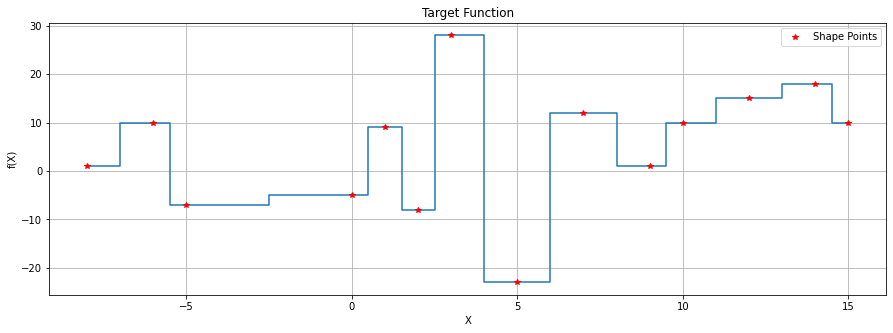

In [3]:
'''Generate the target function f'''

%matplotlib inline
def TargetFunction(lst):
    x = []
    y = []
    for i in range(len(lst)):
        x.append(lst[i][0])
        y.append(lst[i][1])
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(5)
    plt.step(x,y,where = 'mid')
    plt.step(x,y,'r*',where = 'mid', label = 'Shape Points')
    plt.legend(['Shape Points'])
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.title('Target Function')
    plt.grid()
    plt.legend(loc ="upper right")
    return plt


f = TargetFunction(shape_pts)




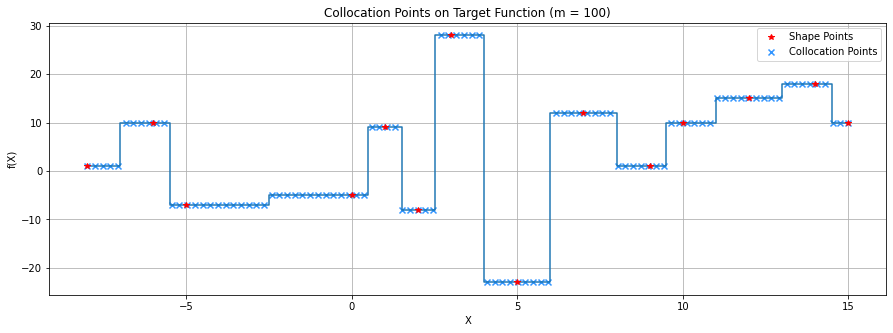

In [4]:
'''Collocation abscissa points'''


x_min = shape_pts[0][0]
x_max = shape_pts[-1][0]
m = 100
assert m >= len(shape_pts)

x = []
y = []
for i in range(len(shape_pts)):
    x.append(shape_pts[i][0])
    y.append(shape_pts[i][1])

u = interpolate.interp1d(x, y, kind='nearest',fill_value='array-like')
x_tilde_pts = np.linspace(x_min, x_max, m)

y_new = u(x_tilde_pts)


y_new = u(x_tilde_pts)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.step(x,y,where = 'mid')
plt.step(x,y,'r*',where = 'mid', label = 'Shape Points')
plt.grid()
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('Collocation Points on Target Function (m = '+str(m)+')')
plt.scatter(x_tilde_pts,y_new,c='#3396FF',marker='x',label='Collocation Points')
plt.legend()
plt.show()


# print(len(x_tilde_pts))


In [5]:
shape_pts = np.array([[-8,1],
                      [-6,10],
                      [-5,-7],
                      [0,-5],
                      [1,9],
                      [2,-8],
                      [3,28],
                      [5,-23],
                      [7,12],
                      [9,1],
                      [10,10],
                      [12,15],
                      [14,18],
                      [15,10]])

m = 100
x_min = shape_pts[0][0]
x_max = shape_pts[-1][0]
x_tilde_pts = np.linspace(x_min, x_max, m)



wavelength = x_max - x_min
kappa = 2*np.pi/wavelength

N = 22 # number of pairs of sine/cosine  


# print(len(x_tilde_pts))


#### Here the A matrix is generateded using collocation points

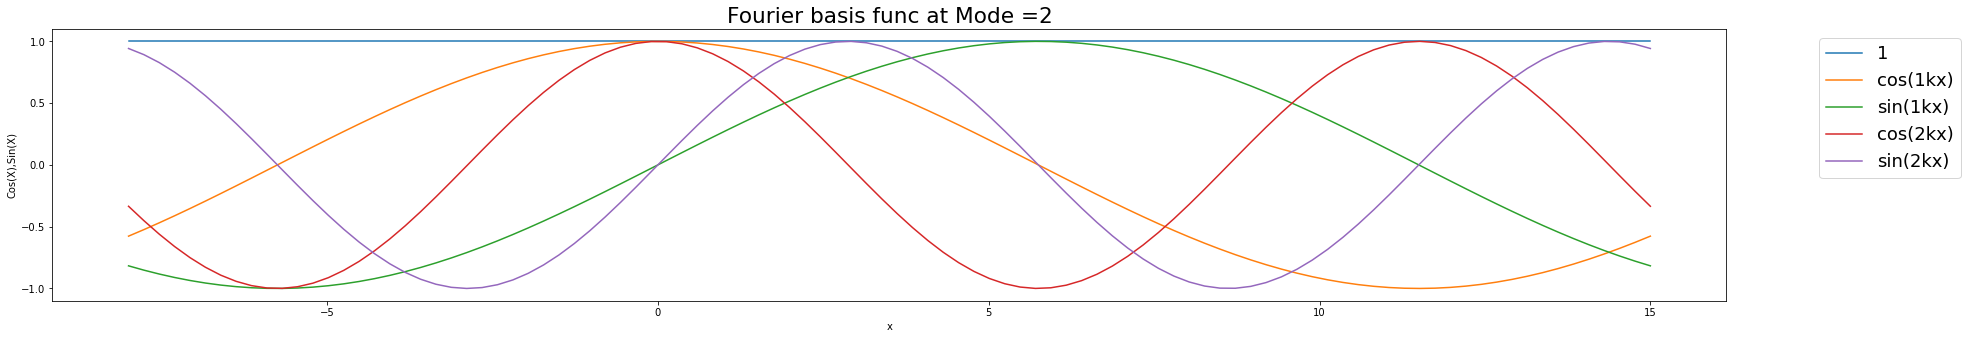

[[ 1.         -0.57668032 -0.81696989 -0.33487961  0.94226092]
 [ 1.         -0.52370385 -0.85190039 -0.45146857  0.89228702]
 [ 1.         -0.4686186  -0.88340059 -0.56079322  0.8279559 ]
 [ 1.         -0.41164639 -0.91134365 -0.6610945   0.75030265]
 [ 1.         -0.35301662 -0.93561705 -0.75075853  0.66057675]
 [ 1.         -0.29296539 -0.95612305 -0.82834256  0.56022192]
 [ 1.         -0.23173448 -0.97277908 -0.89259826  0.45085291]
 [ 1.         -0.16957046 -0.98551807 -0.94249172  0.33422951]
 [ 1.         -0.10672364 -0.99428872 -0.97722013  0.21222823]
 [ 1.         -0.04344709 -0.99905573 -0.9962247   0.08681212]
 [ 1.          0.02000442 -0.99979989 -0.99919965 -0.04000083]
 [ 1.          0.08337537 -0.99651821 -0.9860971  -0.16617015]
 [ 1.          0.1464106  -0.98922391 -0.95712787 -0.28966573]
 [ 1.          0.20885628 -0.97794634 -0.91275811 -0.40850048]
 [ 1.          0.27046098 -0.96273094 -0.85370172 -0.5207623 ]
 [ 1.          0.33097662 -0.94363895 -0.78090895 -0.62

In [6]:
'''Build the basis function evaluation matrix and target function vector at the collocation points'''
wavelength = x_tilde_pts[-1] - x_tilde_pts[0]
Kappa=2*(np.pi)/wavelength
N=2

# FourierBasis Function
def FourierBasis(x_tilde_pts):
    A=np.zeros((len(x_tilde_pts),2*N+1))
    for i in range (len(x_tilde_pts)):
        for j in range((2*N+1)):
            if (j==0):
                A[i,j]=1
            elif (j%2)==1:
                A[i,j]=np.cos(((j//2)+1)*Kappa*x_tilde_pts[i])
            elif (j%2)==0:
                A[i,j]=np.sin((j//2)*Kappa*x_tilde_pts[i])
    return np.array(A)

#Plot Function
def Plot_fourierbasis(function,x_pts):
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(5)
    for i in range(len(function[0])):
        if i==0:
            plt.plot(x_pts,function[:,0],label='1')
        elif i%2==1:
            plt.plot(x_pts,function[:,i], label='cos(%ikx)'%(((i/2)+0.5)))
        elif i%2==0 and i!=0:
            plt.plot(x_pts,function[:,i], label='sin(%ikx)'%(i/2))
        for j in range(len(function[0])//2):
            plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.xlabel('x'); plt.ylabel('Cos(X),Sin(X)')
        plt.title('Fourier basis func at Mode =' + str(N))
        plt.rcParams.update({'font.size': 18})
    return plt.show()
    
A = FourierBasis(x_tilde_pts)
Plot_fourierbasis(A,x_tilde_pts)
print(A)
# print(len(x_tilde_pts))


sin_function = []
for i in range(1,N):
    sine_function = [np.sin(kappa*i*x_tilde_pts),np.cos(kappa*i*x_tilde_pts)]
    sin_function.append(sine_function)

ones = np.ones(len(x_tilde_pts))

A = []

A.append(ones.tolist())



In [7]:
'''Compute optimal coefficient vector'''
rank = np.linalg.matrix_rank(A)

if A.shape[0] > A.shape[1]:
    print('A is overdetermined.')
elif A.shape[0] < A.shape[1]:
    print('A is underdetermined.')  
else:
    print('A is determined.')

if np.linalg.matrix_rank(A) == min(A.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')

#--------------------------------------------------------------#

f_tilde_vec = np.array(y_new)

if np.linalg.matrix_rank(A) == min(A.shape):
    print('A is full rank; solve for least squares.')
    c_tilde_star_vec = solve(A.transpose()@A, A.transpose()@f_tilde_vec)
else:
    print('A is rank deficient; solve for shortest least squares')
    c_tilde_star_vec = universal_solve(A.transpose()@A, A.transpose()@f_tilde_vec,
                                       pivot_tol=1e-6)
    
print('')
print('c_tilde_star_vec:\n')
for j,c in enumerate(c_tilde_star_vec):
    if j == 0:
        print('a_%2i = %10.3e'%(j,c))
    elif j%2 == 0:
        k = j/2
        print('b_%2i = %10.3e'%(k,c))
    else:
        k = (j+1)/2
        print('a_%2i = %10.3e'%(k,c))
        
print('')        
print('||r^*||_2 = %10.3e'%(np.linalg.norm(A@c_tilde_star_vec-f_tilde_vec)))


# print(len(x_tilde_pts))


A is overdetermined.
A is full rank.
A is full rank; solve for least squares.

c_tilde_star_vec:

a_ 0 =  2.944e+00
a_ 1 = -7.516e+00
b_ 1 = -5.467e-01
a_ 2 =  4.641e+00
b_ 2 =  4.677e+00

||r^*||_2 =  1.085e+02


In [8]:
'''Build the best approximant function'''

points_n = max(2*m, 200)
def bestg_vec_func(x_tilde_pts):
    matrics_a = FourierBasis(x_tilde_pts)
    return matrics_a@c_tilde_star_vec

x_tilde_pts_new = np.linspace(x_min, x_max, points_n)
bestg_vec_1 = bestg_vec_func(x_tilde_pts_new)


# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

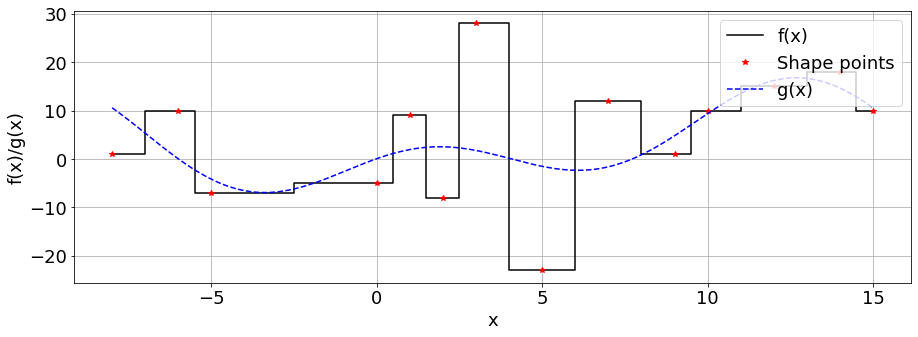

In [9]:
'''Plot comparison of f and g_best_vec'''


f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.step(shape_pts[:,0], shape_pts[:,1], where='mid',label='f(x)', color='k')
plt.plot(shape_pts[:,0], shape_pts[:,1], '*', color='red',label='Shape points')
plt.grid()
plt.plot(x_tilde_pts_new,bestg_vec_1,'--',label='g(x)', color='b')
plt.legend( loc='upper right')
plt.xlabel('x')
plt.ylabel("f(x)/g(x)")
plt.show()


# print(len(x_tilde_pts))


In [10]:
'''L2 norm error'''
def f_integrand(x):
    return u(x)**2
f_integral = quad(f_integrand, x_min, x_max, limit=1000)
f_l2=np.sqrt(f_integral)

print(f_l2[0])
print('||f||_L2 =%10.6f'%f_l2[0])
print('quadrature error =%10.6e'%f_l2[1])

def g2_integrand(x):
    g_vec = bestg_vec_func(np.array([x]))
    print(g_vec)
    return g_vec**2

print('')

g2_integral, error = quad(g2_integrand, x_min, x_max, limit=1000)
print('||g||_L2 =', math.sqrt(g2_integral))
print('quadrature error =', error)

def f_minus_g_2_integrand(x):
    f_x = u(np.array([x]))
    g_vec = bestg_vec_func(np.array([x]))
    return (f_x-g_vec)**2

print('')

f_minus_g_2_integral, error = quad(f_minus_g_2_integrand, x_min, x_max, limit=1000)
print('||f-g||_L2 =', math.sqrt(f_minus_g_2_integral))
print('quadrature error =', error)
r_err=(math.sqrt(f_minus_g_2_integral)/np.sqrt(f_integral)*100)
print('')
print('Relative error = %10.6f'%r_err[0],'%')


# print(len(x_tilde_pts))


64.63358258145173
||f||_L2 = 64.633583
quadrature error =3.142109e-03

[1.01583629]
[9.07676499]
[11.96959488]
[2.33906881]
[16.03871515]
[-6.01532849]
[14.56242412]
[-3.94033907]
[2.62790615]
[2.52387349]
[-1.78487461]
[10.3344614]
[10.81750924]
[6.40102254]
[13.9840616]
[-2.34590095]
[16.7142223]
[-6.74788082]
[9.24003905]
[0.33902463]
[-1.77829733]
[-5.7342752]
[9.8388553]
[1.2579465]
[6.54937606]
[2.08805184]
[0.82341283]
[2.49056666]
[-4.97649781]
[0.62563068]
[-6.83930686]
[-3.69935951]
[10.45634515]
[1.05698099]
[8.54975836]
[1.63124073]
[3.90647496]
[2.4545606]
[-2.31869759]
[1.93676743]
[-6.59702272]
[-1.3766408]
[5.91559334]
[0.76259546]
[11.28893763]
[-0.34746386]
[13.88656117]
[-1.92942173]
[16.4870667]
[-1.94163377]
[15.6966337]
[2.27778478]
[9.84909445]
[0.97438301]
[10.697886]
[0.32111194]
[12.41093843]
[-1.16188661]
[15.38726138]
[-2.3254467]
[16.71743733]
[-0.43643059]
[13.31534468]
||g||_L2 = 36.76491733339694
quadrature error = 1.1321415804843582e-07

||f-g||_L2 = 52

Positives at collocation pts =  39
Negatives at collocation pts =  61
Positives =  202
Negatives =  298


/tmp/ipykernel_73343/180439857.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_tilde_pts, u(x_tilde_pts)-bestg_vec_func(x_tilde_pts),'bx',label='collocation pts',color='red')


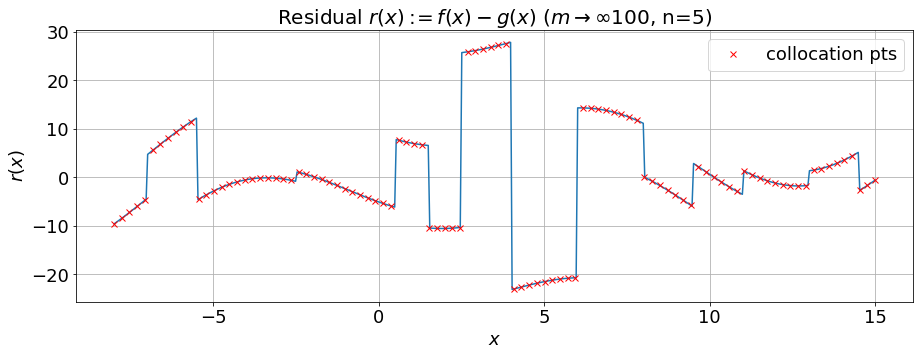

In [11]:
'''Residual of the best approximant'''

points_n = max(3*m, 500)
x_tilde_pts_new = np.linspace(x_min, x_max, points_n)

residual = u(x_tilde_pts_new) - bestg_vec_func(x_tilde_pts_new)
residual_collocation_pts = u(x_tilde_pts) - bestg_vec_func(x_tilde_pts)
print('Positives at collocation pts = ', tuple([True for p in residual_collocation_pts if p>0]).count(True))
print('Negatives at collocation pts = ', tuple([True for p in residual_collocation_pts if p<0]).count(True))
print('Positives = ', tuple([True for p in residual if p>0]).count(True))
print('Negatives = ', tuple([True for p in residual if p<0]).count(True))
  
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(x_tilde_pts_new, residual)
plt.plot(x_tilde_pts, u(x_tilde_pts)-bestg_vec_func(x_tilde_pts),'bx',label='collocation pts',color='red')
plt.title(r'Residual $r(x) :\!\!= f(x) - g(x)$ ($m\rightarrow\infty$'+str(m)+', n='+str(len(A[0]))+')', fontsize=20)

plt.ylabel(r'$r(x)$')
plt.xlabel(r'$x$')

plt.legend(loc='best')
plt.grid(True)
plt.show()


# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

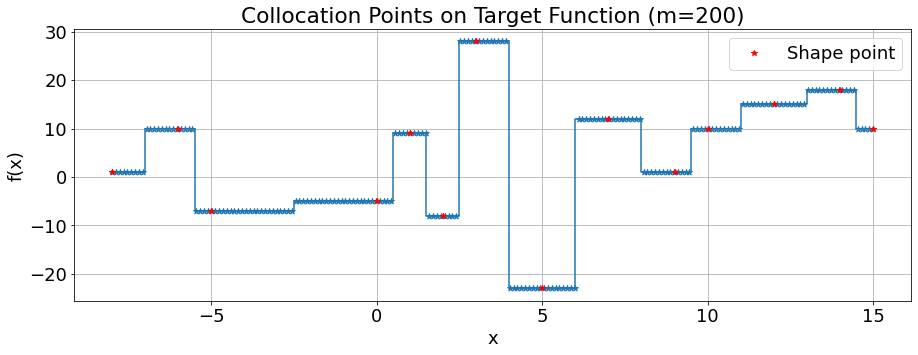

In [12]:
'''Collocation abscissa points'''

m=200
x_tilde_pts = np.linspace(x_min,x_max,m)
u = interpolate.interp1d(shape_pts[:,0], shape_pts[:,1], kind='nearest')
y_new= u(x_tilde_pts)

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.scatter(x_tilde_pts,y_new, marker = '*')
plt.step(shape_pts[:,0], shape_pts[:,1], where='mid')
plt.plot(shape_pts[:,0], shape_pts[:,1], '*', color='red',label= 'Shape point')
plt.legend()
plt.title('Collocation Points on Target Function (m='+str(m)+')')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

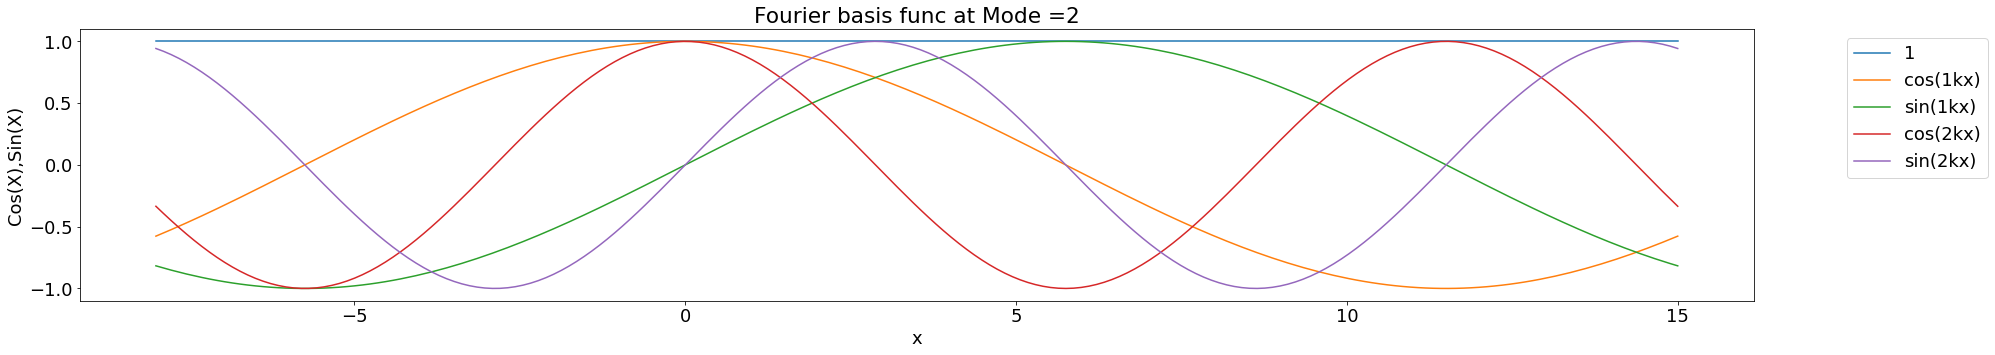

In [13]:
'''Build the basis function evaluation matrix and target function vector at the collocation points'''
A=FourierBasis(x_tilde_pts)
Plot_fourierbasis(A,x_tilde_pts)

# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

In [14]:
'''Compute optimal coefficient vector'''
rank = np.linalg.matrix_rank(A)

if A.shape[0] > A.shape[1]:
    print('A is overdetermined.')
elif A.shape[0] < A.shape[1]:
    print('A is underdetermined.')  
else:
    print('A is determined.')

if np.linalg.matrix_rank(A) == min(A.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')

##########################################################################################

f_tilde_vec = np.array(y_new)

if np.linalg.matrix_rank(A) == min(A.shape):
    print('A is full rank; solve for least squares.')
    c_tilde_star_vec = solve(A.transpose()@A, A.transpose()@f_tilde_vec)
else:
    print('A is rank deficient; solve for shortest least squares')
    c_tilde_star_vec = universal_solve(A.transpose()@A, A.transpose()@f_tilde_vec,
                                       pivot_tol=1e-6)
    
print('')
print('c_tilde_star_vec:\n')
for j,c in enumerate(c_tilde_star_vec):
    if j == 0:
        print('a_%2i = %10.3e'%(j,c))
    elif j%2 == 0:
        k = j/2
        print('b_%2i = %10.3e'%(k,c))
    else:
        k = (j+1)/2
        print('a_%2i = %10.3e'%(k,c))
        
print('')        
print('||r^*||_2 = %10.3e'%(np.linalg.norm(A@c_tilde_star_vec-f_tilde_vec)))

# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

A is overdetermined.
A is full rank.
A is full rank; solve for least squares.

c_tilde_star_vec:

a_ 0 =  3.361e+00
a_ 1 = -7.223e+00
b_ 1 = -3.281e-01
a_ 2 =  4.619e+00
b_ 2 =  5.159e+00

||r^*||_2 =  1.554e+02


In [15]:
'''Build the best approximant function'''
points_n = max(2*m, 200)

x_tilde_pts_new = np.linspace(x_min, x_max, points_n)
bestg_vec_1 = bestg_vec_func(x_tilde_pts_new)


# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

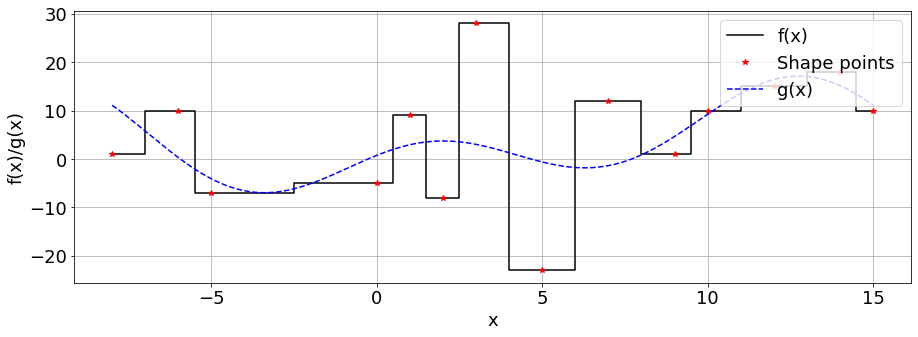

In [16]:
'''Plot comparison of f and g_best_vec'''


f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.step(shape_pts[:,0], shape_pts[:,1], where='mid',label='f(x)', color='k')
plt.plot(shape_pts[:,0], shape_pts[:,1], '*', color='red',label='Shape points')
plt.grid()
plt.plot(x_tilde_pts_new,bestg_vec_1,'--',label='g(x)', color='b')
plt.legend( loc='upper right')
plt.xlabel('x')
plt.ylabel("f(x)/g(x)")
plt.show()

# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

In [17]:
'''L2 norm error'''


g2_integral, error = quad(g2_integrand, x_min, x_max, limit=1000)
print('||g||_L2 =', math.sqrt(g2_integral))
print('quadrature error =', error, '\n')



f_minus_g_2_integral, error = quad(f_minus_g_2_integrand, x_min, x_max, limit=1000)
print('||f-g||_L2 =', math.sqrt(f_minus_g_2_integral))
print('quadrature error =', error)
r_err=(math.sqrt(f_minus_g_2_integral)/np.sqrt(f_integral)*100)
print('\n')
print('Relative error = %10.6f'%r_err[0],'%')

# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

[2.24166405]
[9.58967165]
[12.50992101]
[2.68636312]
[16.50405161]
[-6.01269312]
[14.62833308]
[-3.70452196]
[2.52880893]
[3.68896578]
[-0.94777066]
[10.86365975]
[11.35130114]
[6.86210441]
[14.51550583]
[-2.17386202]
[17.0188286]
[-6.76742187]
[9.10730793]
[1.06380812]
[-1.50394024]
[-5.6650205]
[10.36234314]
[2.49806707]
[7.01386326]
[3.34684818]
[1.11895978]
[3.63180156]
[-4.92301602]
[1.39106463]
[-6.86740983]
[-3.4398418]
[10.98679624]
[2.28544511]
[9.05417375]
[2.88687383]
[4.30214696]
[3.68234965]
[-2.14551017]
[2.92246674]
[-6.62316582]
[-0.86856797]
[5.7592723]
[1.97045034]
[11.82620475]
[0.74822583]
[14.4192443]
[-1.13471423]
[16.9114306]
[-1.62652083]
[15.84985364]
[2.19110839]
[9.72831393]
[2.19747243]
[11.23063419]
[1.49084924]
[12.95185376]
[-0.18889837]
[15.88545745]
[-1.75849608]
[17.02330686]
[-0.35476013]
[13.3118367]
||g||_L2 = 37.58467887769371
quadrature error = 1.0586901488807143e-07 

||f-g||_L2 = 52.56759764229021
quadrature error = 1.573993267811602e-05


Relat

Positives at collocation pts =  80
Negatives at collocation pts =  120
Positives =  240
Negatives =  360


/tmp/ipykernel_73343/2858370551.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_tilde_pts, u(x_tilde_pts)-bestg_vec_func(x_tilde_pts),'bx',label='collocation pts',color='red')


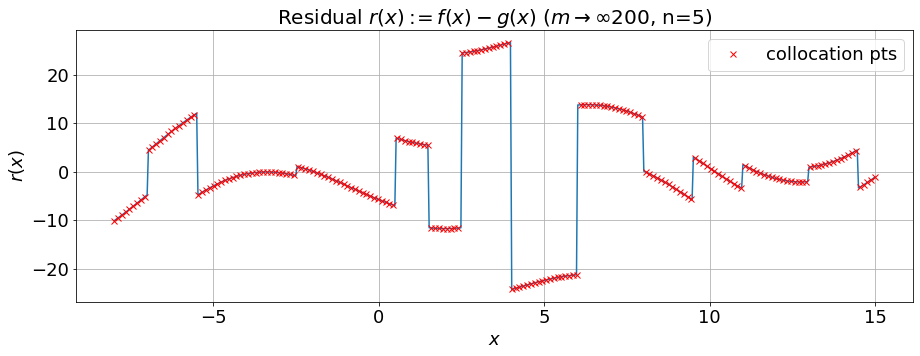

In [18]:
'''Residual of the best approximant'''

points_n = max(3*m, 500)
x_tilde_pts_new = np.linspace(x_min, x_max, points_n)

residual = u(x_tilde_pts_new) - bestg_vec_func(x_tilde_pts_new)
residual_collocation_pts = u(x_tilde_pts) - bestg_vec_func(x_tilde_pts)
print('Positives at collocation pts = ', tuple([True for p in residual_collocation_pts if p>0]).count(True))
print('Negatives at collocation pts = ', tuple([True for p in residual_collocation_pts if p<0]).count(True))
print('Positives = ', tuple([True for p in residual if p>0]).count(True))
print('Negatives = ', tuple([True for p in residual if p<0]).count(True))
  
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(x_tilde_pts_new, residual)
plt.plot(x_tilde_pts, u(x_tilde_pts)-bestg_vec_func(x_tilde_pts),'bx',label='collocation pts',color='red')
plt.title(r'Residual $r(x) :\!\!= f(x) - g(x)$ ($m\rightarrow\infty$'+str(m)+', n='+str(len(A[0]))+')', fontsize=20)

plt.ylabel(r'$r(x)$')
plt.xlabel(r'$x$')

plt.legend(loc='best')
plt.grid(True)
plt.show()

# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

In [19]:
print(len(x_tilde_pts))
print(len(x_tilde_pts_new))

200
600


In [20]:
print(points_n)

600
